# Supermarket sales

#### Context
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

#### Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and - beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Load the Supermarket sales dataset into a pandas dataframe

In [2]:
supermarket_sales = pd.read_csv('https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv')

Display the first few rows of the dataset

In [3]:
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Plot 1: Gross income by City
>The first aspect I want to visualize is the gross income performance of each supermarket. This information is valuable for various reasons, including analyzing the metrics of the top-performing branch and applying the same strategies to other branches, rewarding the managers of the leading branch with a cash bonus, and determining whether it is beneficial to keep certain branches open. Although all three branches reported similar gross income results, the branch in Naypyitaw emerged as the top performer. 

I use the **groupby** function to group the data by each store, and then apply the **sum** function to aggregate the gross income data. By doing this, I obtain a new DataFrame that shows the total gross income for each store. To ensure that the "City" variable becomes the first column and "gross income" becomes the second column of the DataFrame, I use the **reset_index** function.If the index is not reset, the "City" variable would be automatically considered as the index of the DataFrame.

In [4]:
city_gross_income = supermarket_sales.groupby('City')['gross income'].sum().reset_index()
city_gross_income

,City,gross income
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


Using **matplotlib** and **seaborn** libraries, I create a bar plot to compare the total gross income of the three branches across different cities.

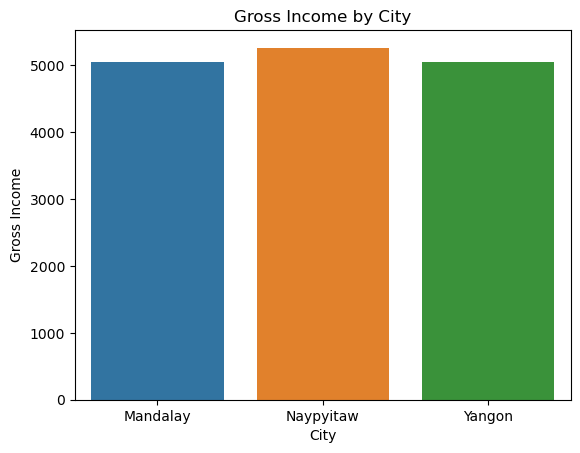

In [5]:
sns.barplot(x='City', y='gross income', data=city_gross_income)
plt.title('Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()

### Plot 2: Sales by product line
>I create a **pie chart** to visualize the breakdown of sales across different product lines. Understanding which product line sells the most is crucial for making decisions regarding future investments and balancing the range of items offered to clients in order to maximize returns. Despite the similar performance of each product line, the top-selling category is “Food and beverage”.

Using the **groupby** function and the **sum** function, I aggregate the total sales for each product line. 

In [6]:
product_line_sales = supermarket_sales.groupby('Product line')['Total'].sum().reset_index()
product_line_sales

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


I create a pie chart to visualize the sales breakdown across different product lines.  I use the function **autopct='%1.2f%%'** to automatically calculate and display on the pie the percentages for each section with two decimal places.

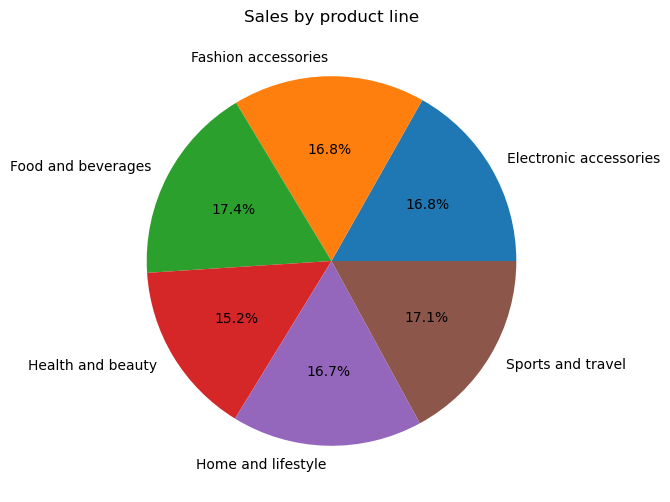

In [7]:
plt.figure(figsize=(8, 6))
plt.pie(product_line_sales['Total'], labels=product_line_sales['Product line'], autopct='%1.1f%%')
plt.title('Sales by product line')
plt.show()

### Plot 3: Total sales by city and product line
>This horizontal bar chart is useful for identifying the differences between the three branches in terms of the product lines they sell. With the help of this chart, I can determine which product lines perform better at each branch and develop an investment strategy based on that information.

I calculate the total quantity sold by each product line in each city.

In [8]:
city_product_sales = supermarket_sales.groupby(['City', 'Product line'])['Total'].sum().reset_index()
city_product_sales

,City,Product line,Total
0,Mandalay,Electronic accessories,17051.4435
1,Mandalay,Fashion accessories,16413.3165
2,Mandalay,Food and beverages,15214.8885
3,Mandalay,Health and beauty,19980.6600
4,Mandalay,Home and lifestyle,17549.1645
5,Mandalay,Sports and travel,19988.1990
6,Naypyitaw,Electronic accessories,18968.9745
7,Naypyitaw,Fashion accessories,21560.0700
8,Naypyitaw,Food and beverages,23766.8550
9,Naypyitaw,Health and beauty,16615.3260


I choose **whitegrid** as style and I create a barplot to visualize my data. I add **figsize=(10, 6)** to make the picture (and the plot) larger, and I add a legend on the left using the function **plt.legend**.

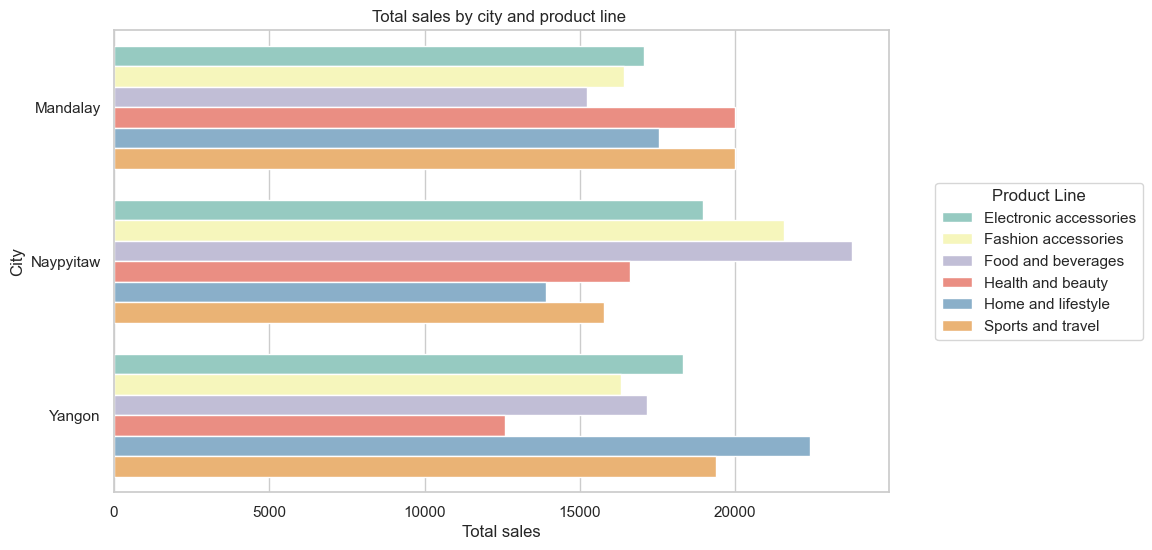

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(x='Total', y='City', hue='Product line', data=city_product_sales, palette='Set3')

plt.title('Total sales by city and product line ')
plt.xlabel('Total sales')
plt.ylabel('City')

plt.legend(title='Product Line', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()

### Plot 4: Gross Income by product line and city
>This chart provides information on how each product line contributes to the generation of gross income for each branch. I can see that there is an issue with the health and beauty sector at the Yangon branch, whereas the food and beverage product line at the Naypyitaw branch significantly boosts gross income.

I group the data by product line and city, and calculate the total gross income.

In [10]:
grouped_data = supermarket_sales.groupby(['Product line', 'City']).agg({'gross income': 'sum'}).reset_index()
grouped_data

,Product line,City,gross income
0,Electronic accessories,Mandalay,811.9735
1,Electronic accessories,Naypyitaw,903.2845
2,Electronic accessories,Yangon,872.2435
3,Fashion accessories,Mandalay,781.5865
4,Fashion accessories,Naypyitaw,1026.6700
5,Fashion accessories,Yangon,777.7385
6,Food and beverages,Mandalay,724.5185
7,Food and beverages,Naypyitaw,1131.7550
8,Food and beverages,Yangon,817.2905
9,Health and beauty,Mandalay,951.4600


I create a line chart to visually represent the distribution of gross income across different product lines for each store, allowing us to analyze the proportion of income derived from each product line.

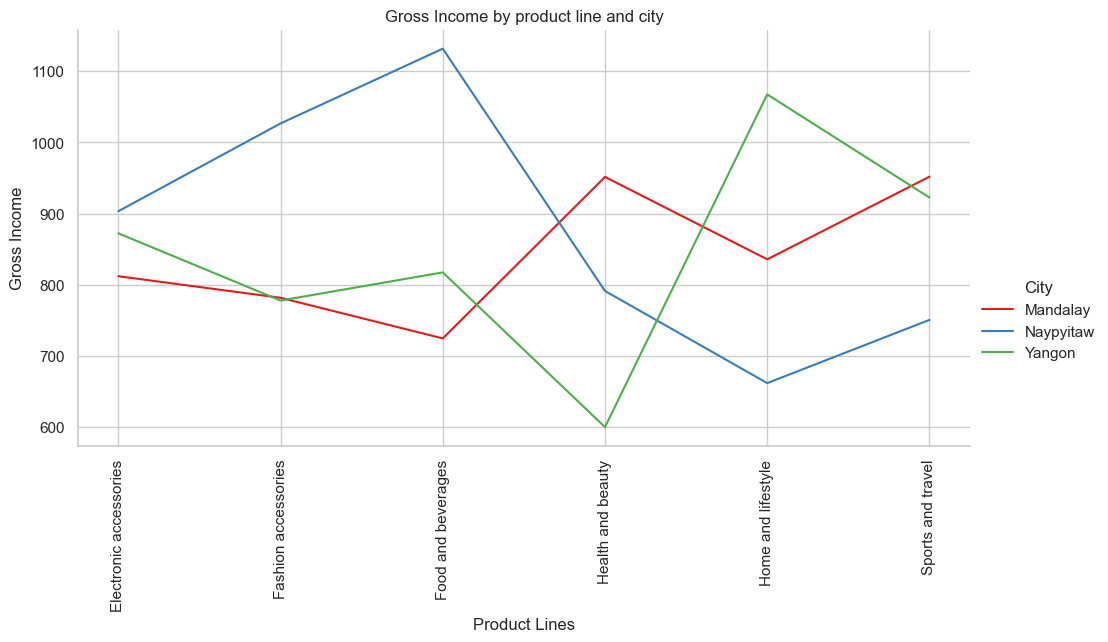

In [11]:
line_chart = sns.relplot(x='Product line',  y='gross income', hue='City',  kind='line',   palette='Set1', aspect=2,  data=grouped_data) 
line_chart.set(xlabel='Product Lines', ylabel='Gross Income', title='Gross Income by product line and city')
plt.xticks(rotation=90)
plt.show()

### Plot  5  -  Gross Income over time
>A graphical visualization that shows the variation in gross income over a three-month period. I can observe that there is significant volatility, indicating high risks associated with the operations.

In the data frame, the 'Date' column is currently an 'object' datatype. I need to convert it into the 'datetime' format in order to perform a time-series analysis.

In [12]:
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'])

I group the data by 'Date' and calculate the sum of gross income for every date.

In [13]:
gross_income_by_date = supermarket_sales.groupby('Date')['gross income'].sum().reset_index()
gross_income_by_date

,Date,gross income
0,2019-01-01,225.9610
1,2019-01-02,92.6430
2,2019-01-03,98.9585
3,2019-01-04,77.3185
4,2019-01-05,168.4135
...,...,...
84,2019-03-26,93.4530
85,2019-03-27,138.2295
86,2019-03-28,106.1620
87,2019-03-29,191.5830


I plot the data with a area chart. I use the function **plt.fill_between** to color the area below the line chart. With **alpha**, I can specify the intensity of the color (I set 0.4). 

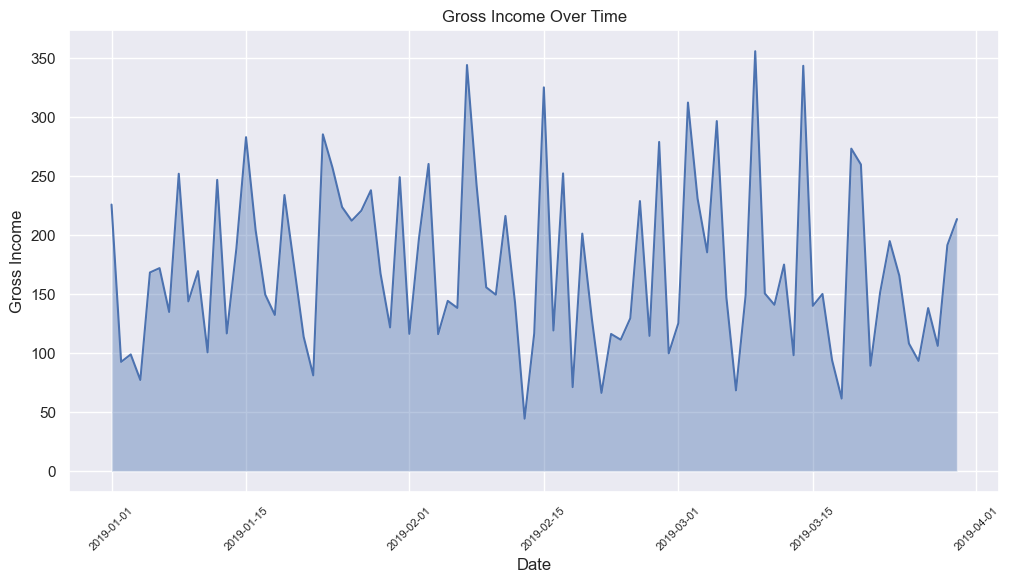

In [14]:
sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
plt.fill_between(gross_income_by_date['Date'], gross_income_by_date['gross income'], alpha=0.4)
plt.plot(gross_income_by_date['Date'], gross_income_by_date['gross income'])

plt.title('Gross Income Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Income')

plt.xticks(rotation=45, fontsize=8)

plt.show()

### Plot  6  - Ratings by product line
>A **boxplot** is used to understand customer satisfaction for each product line. 

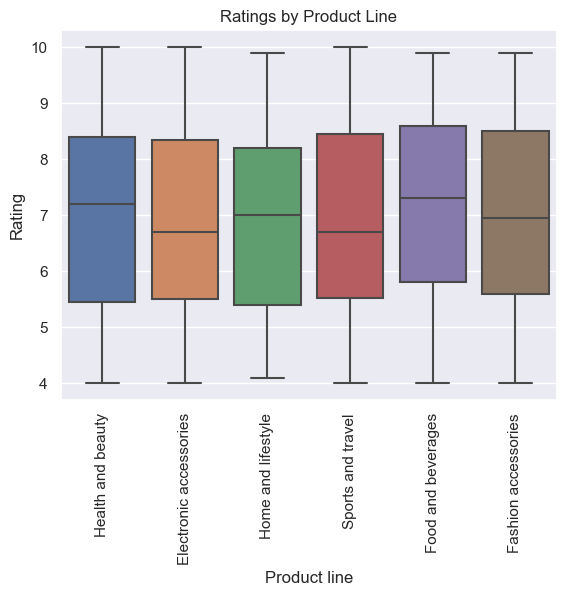

In [15]:
sns.boxplot(x='Product line', y='Rating', data=supermarket_sales)
plt.xticks(rotation=90)
plt.title('Ratings by Product Line')
plt.show()

### Plot  7  - Ratings by city
>A **swarm plot** is used to understand customer’s satisfaction for each branch.

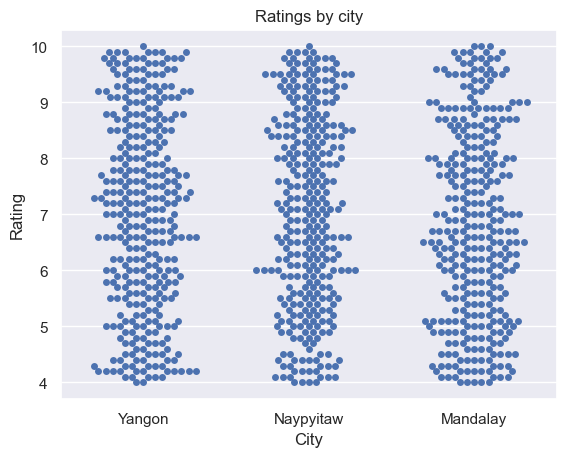

In [16]:
sns.swarmplot(x='City', y='Rating', data=supermarket_sales)
plt.title('Ratings by city')
plt.show()

### Plot  8  -  Payment methods in each city

>The objective is to understand which payment method is more prevalent in each location, in order to improve customers' payment experience. This can be achieved by either providing more cash exchange options at specific locations or allocating a larger budget for the maintenance of electronic infrastructures and service fees in other locations.

I create a **bar chart** to compare the different payment methods used at various locations.

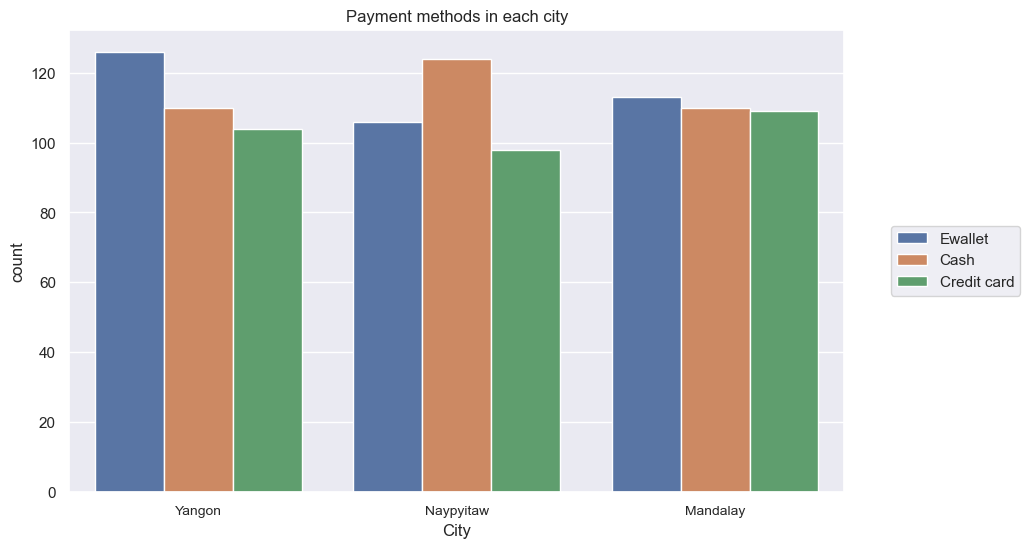

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Payment', data=supermarket_sales)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(size=10)
plt.title('Payment methods in each city')
plt.show()

### Plot  9  -  Payment method by payment amount
>The goal is to understand whether the payment method is linked to the amount spent. Specifically, the hypothesis is that Cash is more likely to be used for small payments, while E-wallets and Credit cards are more commonly used for larger payments.  If this hypothesis holds true, it would be beneficial to increase the availability of electronic payment methods to incentivize higher spending.

I create a **stripplot** to visualize differences in payment method with respect to payment amounts.

C:\Users\aless\AppData\Local\Temp\ipykernel_28068\3459771124.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x= 'Payment', y='Total', data=supermarket_sales,  palette='bright')


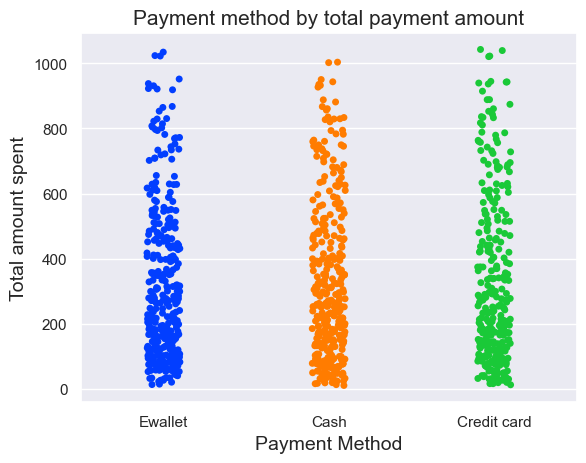

In [19]:
sns.stripplot(x= 'Payment', y='Total', data=supermarket_sales,  palette='bright')
plt.ylabel('Total amount spent', fontsize='14')
plt.xlabel('Payment Method', fontsize='14')
plt.title('Payment method by total payment amount', fontsize='15')
plt.show()

### Plot  10  -  Gender by City, Customer Type by City
>Two **bar charts** are used to better understand the demographics and composition of clients, as well as to develop corresponding selling strategies.

The first chart compares the gender distribution of the clients at each location, while the second chart compares the number of regular clients to the number of member clients in each location. I use the function **plt.tight_layout()** to adjust the spacing bewteen the subplots.

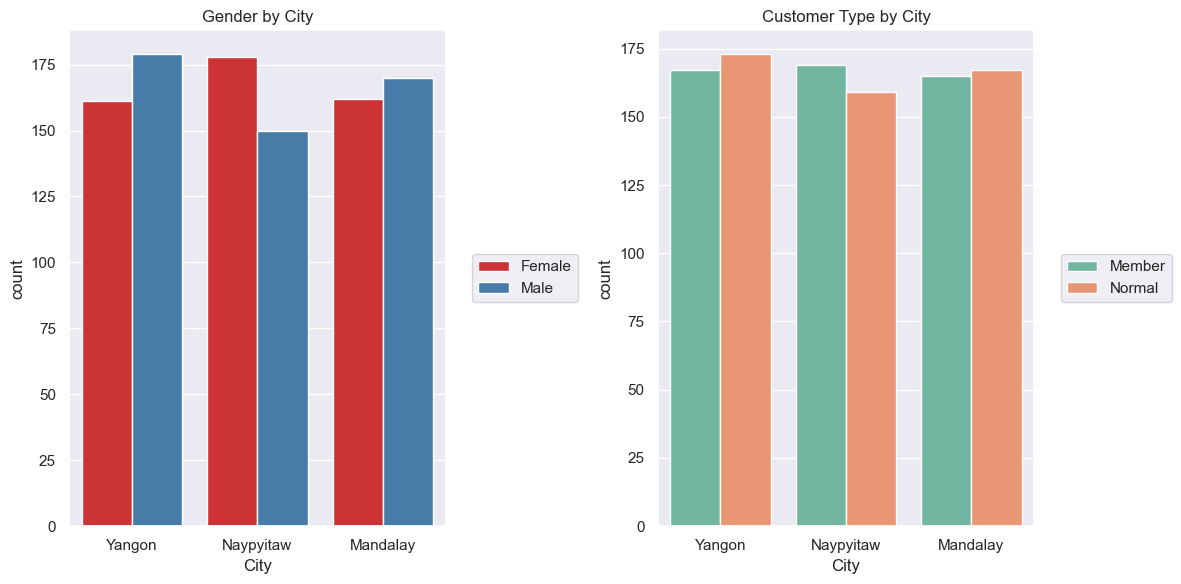

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(x='City', hue='Gender', data=supermarket_sales, ax=axes[0], palette='Set1')
axes[0].set_title('Gender by City')
axes[0].legend(bbox_to_anchor=(1.05, 0.5), loc="center left")


sns.countplot(x='City', hue='Customer type', data=supermarket_sales, ax=axes[1], palette='Set2')
axes[1].set_title('Customer Type by City')
axes[1].legend(bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout()

plt.show()

### Plot  11  -  Total amount spent by customer type
>I have created two **violin plots** to visualize whether member customers spend more than normal customers. However, the data does not show any significant difference. Therefore, further efforts are needed to enhance customer loyalty among the member segment.

Coding the violin plots.

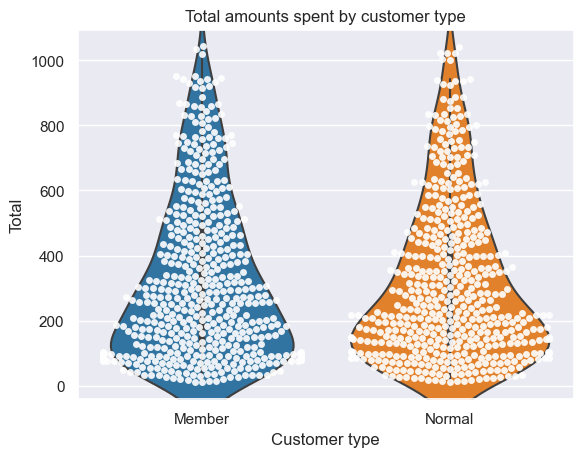

In [21]:
sns.violinplot(x= 'Customer type', y='Total', palette='tab10', data=supermarket_sales)

sns.swarmplot(x='Customer type', y='Total', data=supermarket_sales, color='w', alpha=.9).set(title='Total amounts spent by customer type')
plt.show();

### Plot  12  -  Pairwise Scatter Plot of Numerical Features

To obtain a more comprehensive and precise understanding of the variations in numerical performance between the customer types "Member" and "Normal," a pairwise scatter plot of the numerical features can be created. This plot will provide a clearer visual representation of the differences.

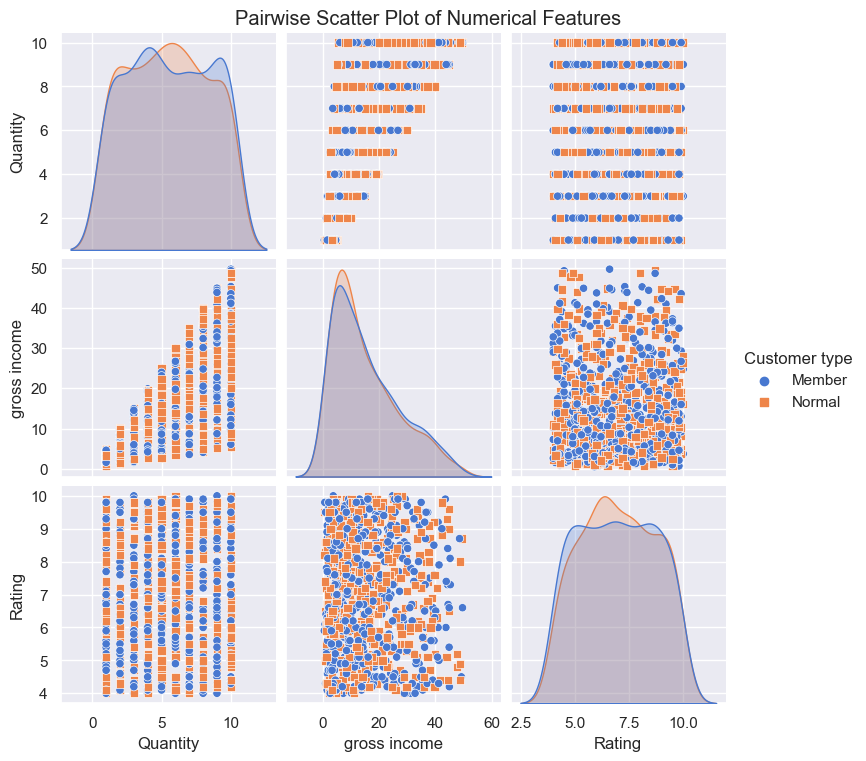

In [22]:
sns.set_palette('muted')
sns.pairplot(supermarket_sales.dropna(), vars=['Quantity', 'gross income', 'Rating'], hue='Customer type', markers=['o', 's'])
plt.suptitle('Pairwise Scatter Plot of Numerical Features', y=1.01)
plt.show()

### Plot  13  -  Missing Data
>**Heatmap** is used to show whether there is missing data in the dataset.

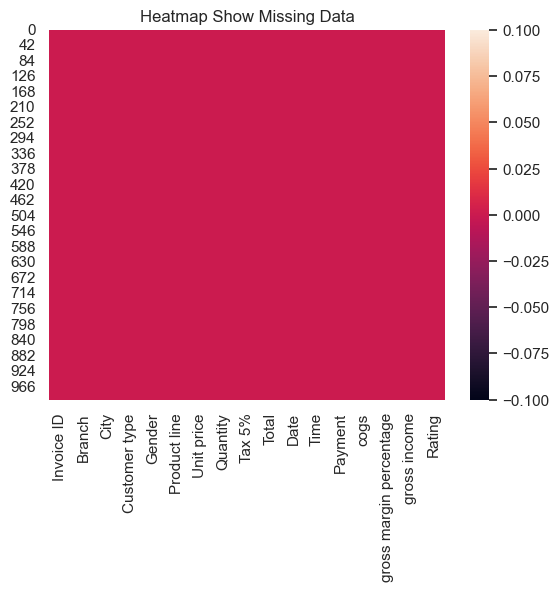

In [23]:
sns.heatmap(supermarket_sales.isna())
plt.title('Heatmap Show Missing Data')
plt.show()